In [1]:
# some plot settings
import matplotlib.pyplot as plt
plt.style.use('ggplot')
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
plt.rcParams['text.color'] = 'black'
plt.rcParams['axes.labelcolor'] = 'black'
plt.rcParams['xtick.color'] = 'black'
plt.rcParams['ytick.color'] = 'black'
plt.rcParams['font.family'] = "CMU Serif"
plt.rcParams['figure.figsize'] = [10,6]
plt.rcParams['figure.dpi'] = 120 
plt.rc('text', usetex=True) 

In [2]:
# we will often use the tqdm progress bar
from tqdm.auto import tqdm,trange

## 20. An optimal stopping problem 

Please refer to page 91-95 of [the book](https://books.google.ch/books?id=bmhuaGP3FOEC&printsec=frontcover&hl=de&source=gbs_ge_summary_r&cad=0#v=onepage&q&f=false) for the problem description.

In [3]:
import numpy as np

def probVeryBest(population, sampleSize, topTolerance) :
    # topTolerace = whether you want the anyone among the top N best
    people = [i+1 for i in range(population)]
    sims = 10**5
    foundBest = 0
    for i in range(sims) :
        dates = people
        np.random.shuffle(dates)
        sample = dates[:sampleSize]
        outOfSample = np.array(dates[sampleSize:]) # convert to np array
        # find the best in the sample, if the sample size is zero give the 
        # best ranking within the "null sample" an incredibly low rank ~ 10^10
        bestInSample = (min(sample) if sampleSize > 0 else 10^10)
        # once out of sample select the first person 
        # who is better then the best of the sample
        possibilitiesOut = outOfSample[ outOfSample < bestInSample ] 
        # make a selection
        if len(possibilitiesOut) >= 1 :
            # pick the first person better than the sample
            choose = possibilitiesOut[0] 
        elif len(possibilitiesOut) == 0 :
            # pick the last person in the entire population
            choose = dates[-1]
        # is the choice among the top?
        if choose <= topTolerance :
            foundBest += 1 
    return foundBest/sims

In [4]:
N=11

bestData1 = [probVeryBest(N,n,1) for n in trange(N)]
bestData2 = [probVeryBest(N,n,2) for n in trange(N)]
bestData3 = [probVeryBest(N,n,3) for n in trange(N)]

bestData1

  0%|          | 0/11 [00:00<?, ?it/s]

  0%|          | 0/11 [00:00<?, ?it/s]

  0%|          | 0/11 [00:00<?, ?it/s]

[0.09156,
 0.26617,
 0.34945,
 0.38986,
 0.39844,
 0.3861,
 0.3538,
 0.30418,
 0.24468,
 0.17172,
 0.08991]

This is in good agreement with the data on page 94. 

Text(0.5, 0, 'Sample size')

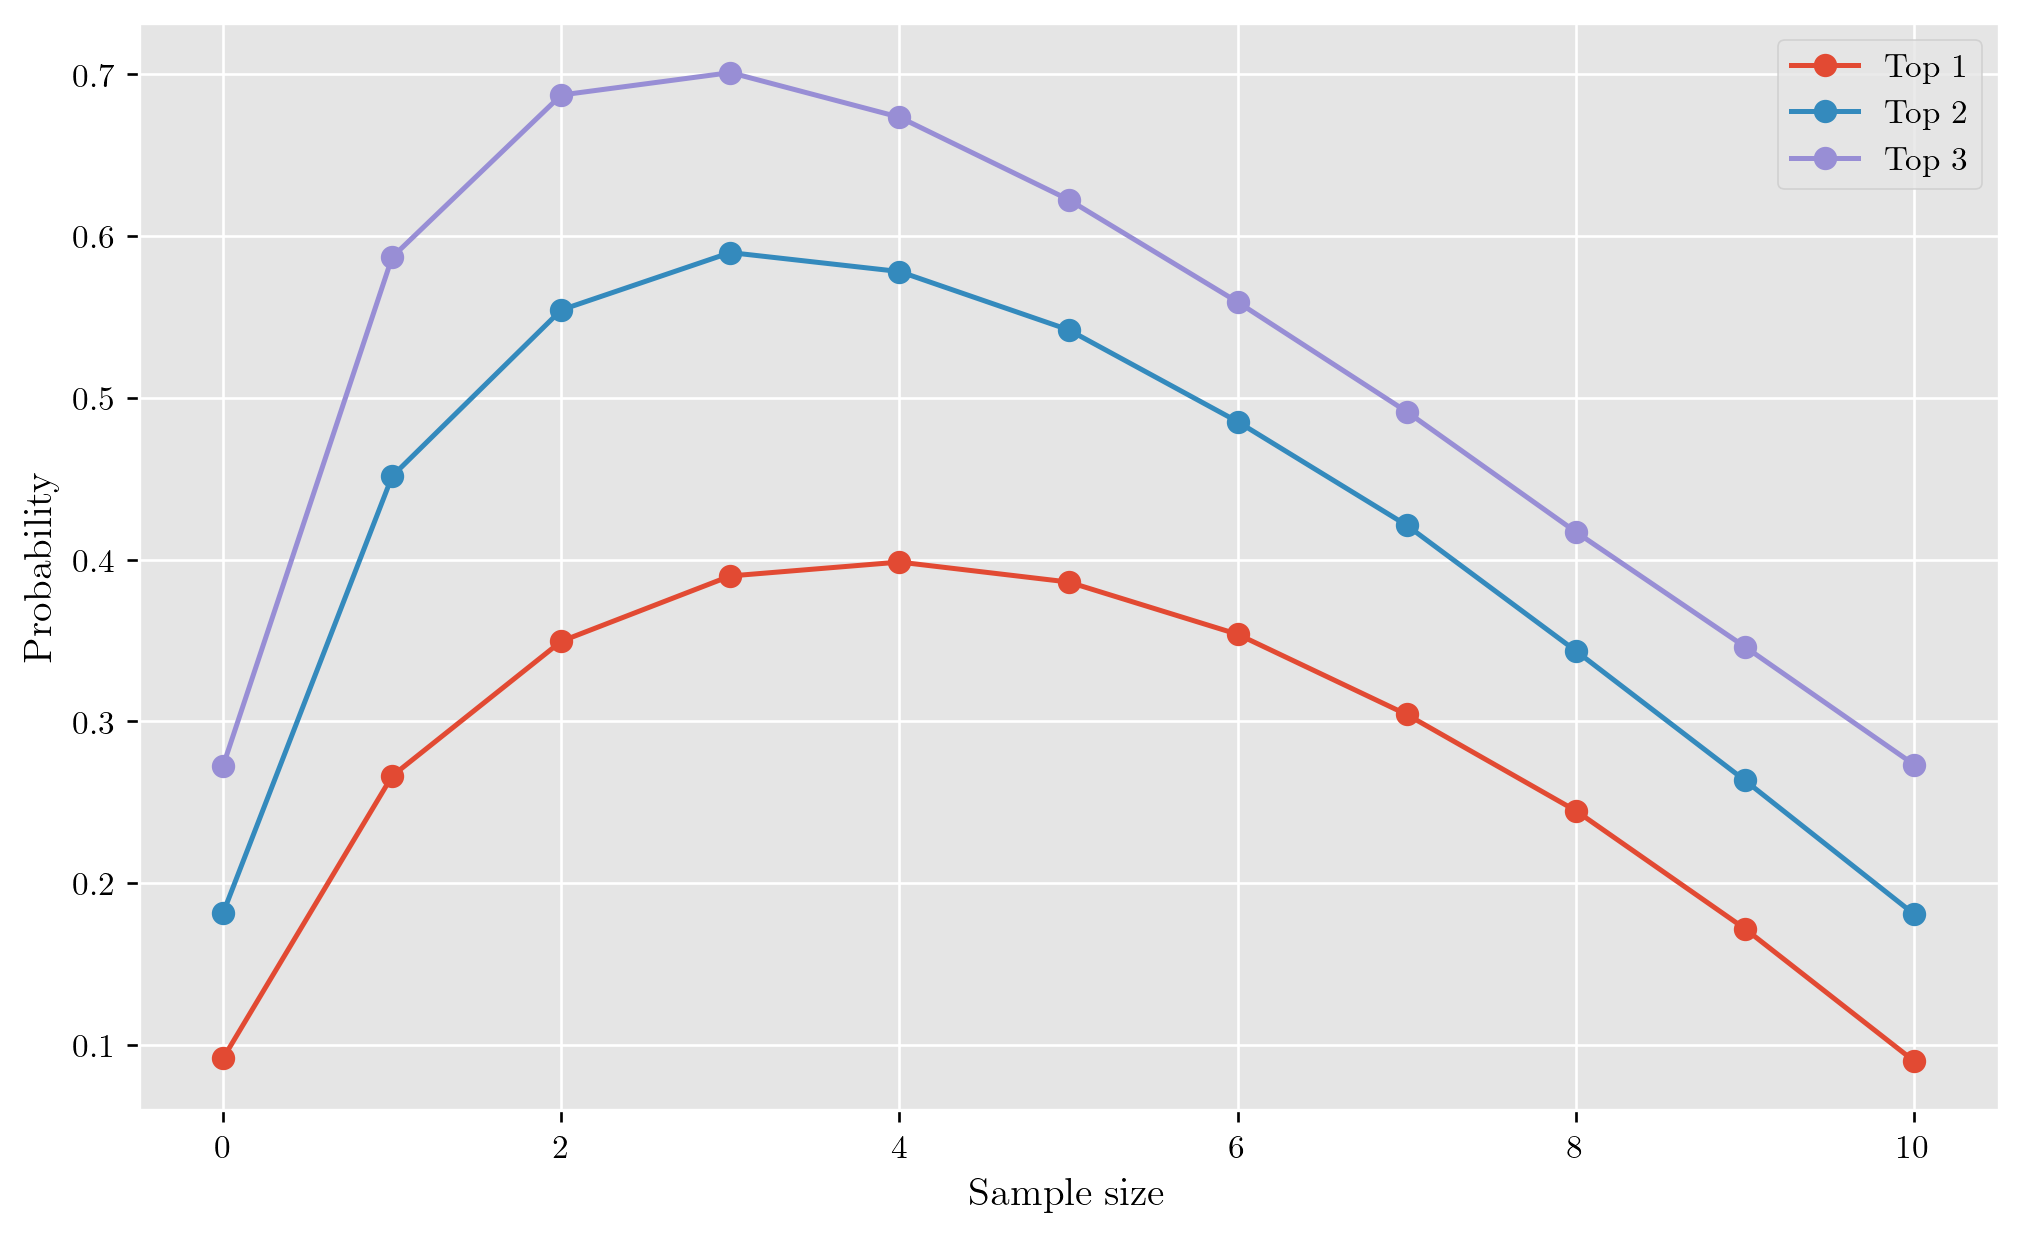

In [5]:
plt.plot(range(N), bestData1, '-o')
plt.plot(range(N), bestData2, '-o')
plt.plot(range(N), bestData3, '-o')
plt.legend(["Top 1", "Top 2", "Top 3"])
plt.ylabel('Probability')
plt.xlabel('Sample size')

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

Text(0.5, 0, 'Sample size')

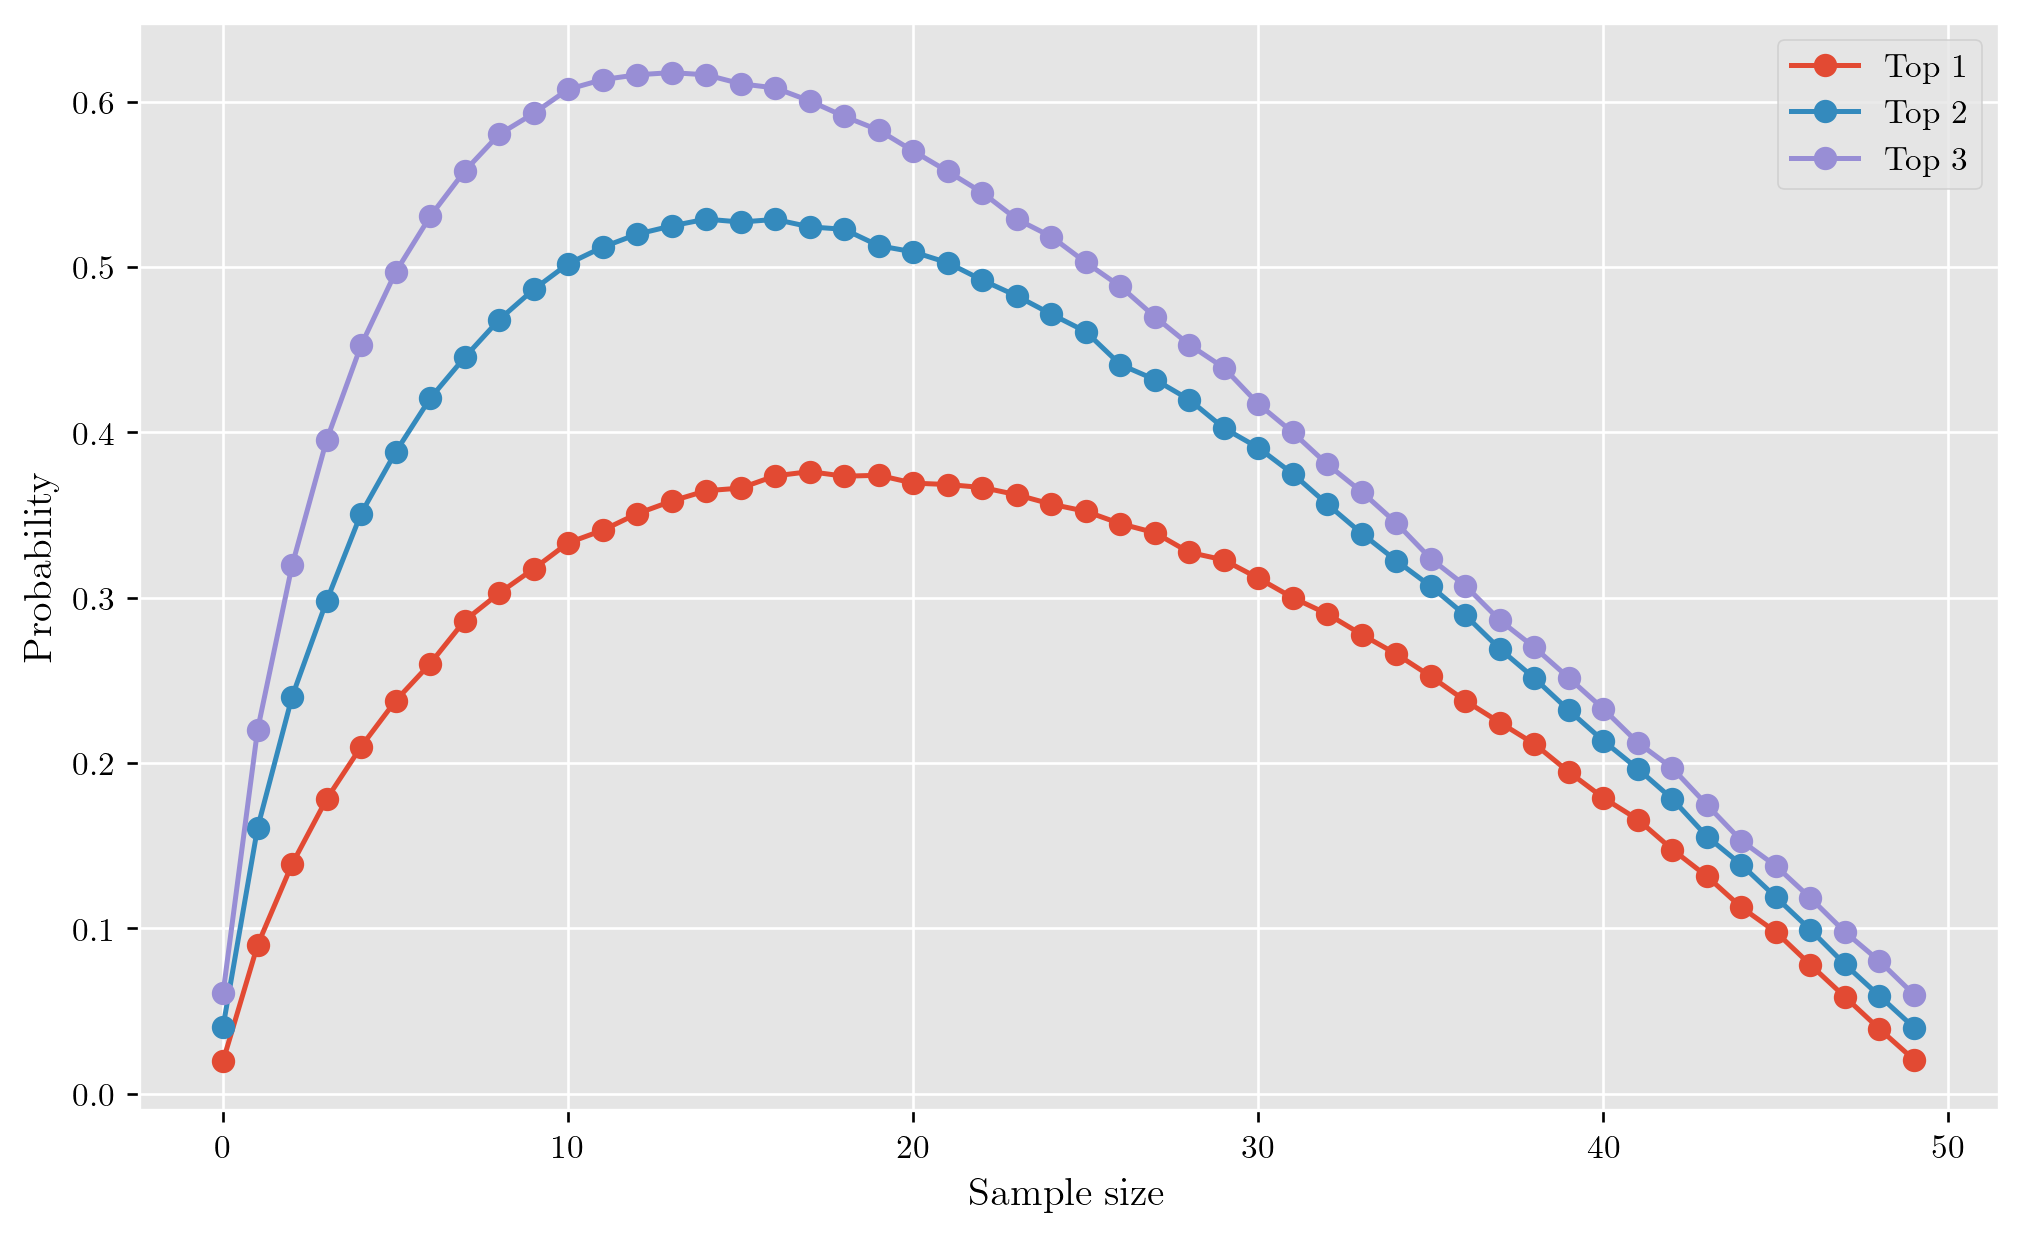

In [7]:
N=50

bestData1 = [probVeryBest(N,n,1) for n in trange(N)]
bestData2 = [probVeryBest(N,n,2) for n in trange(N)]
bestData3 = [probVeryBest(N,n,3) for n in trange(N)]

plt.plot(range(N), bestData1, '-o')
plt.plot(range(N), bestData2, '-o')
plt.plot(range(N), bestData3, '-o')
plt.legend(["Top 1", "Top 2", "Top 3"])
plt.ylabel('Probability')
plt.xlabel('Sample size')